# Clean Individual Level Data

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import os 

home = os.path.expanduser('~')
import sys; sys.path.append(home+'/github/access-to-financial-markets/src')
import json_utils

In [29]:
raw = home + '/Dropbox/data/mexico_fls/raw/2005/'
interim = home + '/Dropbox/data/mexico_fls/interim2/2005/'

figs = home + '/github/access-to-financial-markets/fig/'
dicts= home + '/github/access-to-financial-markets/dicts/'

In [30]:
education = json_utils.load_json(dicts + 'education.json')
rename = json_utils.load_json(dicts + 'rename_ind_2005.json')
naics = json_utils.load_json(dicts + 'naics_industry.json')

In [31]:
ids = ['folio', 'ls', 'pid_link']
keep = ['folio', 'ls', 'pid_link']
os.chdir(raw + 'book IIIB/data/')
portad = pd.read_stata('iiib_portad.dta')
portad = portad.sort_values(by=['folio', 'ls'])

In [32]:
portad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20607 entries, 0 to 20606
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   catorcena  20607 non-null  float32
 1   edad       20606 non-null  float32
 2   edo_civil  20607 non-null  int8   
 3   ent        20607 non-null  float32
 4   folio      20607 non-null  object 
 5   ls         20607 non-null  object 
 6   pid_link   20607 non-null  object 
 7   rel        20607 non-null  float32
dtypes: float32(4), int8(1), object(3)
memory usage: 825.2+ KB


In [33]:
os.chdir(raw + 'book IIIA/data/')
weights_3a = pd.read_stata('weights.dta')
weights_3a = (weights_3a.query('fac_3a>0')
              .drop_duplicates()
              .sort_values(by=['folio', 'ls']))
weights_3a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19544 entries, 0 to 35087
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   folio   19544 non-null  object
 1   ls      19544 non-null  object
 2   fac_3a  19544 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 534.4+ KB


In [34]:
# ids
os.chdir(raw + 'book C/data/')
df_ls = pd.read_stata('c_ls.dta')
df_ls = df_ls.drop(columns='pid_link')

os.chdir(raw + 'book IIIA/data/')
# employment
df_tb = pd.read_stata('iiia_tb.dta')
df_tb = df_tb.drop(columns='pid_link')

# education
df_ed = pd.read_stata('iiia_ed.dta')
df_ed = df_ed.drop(columns='pid_link')

# non labor income, is ANNUAL
df_iin = pd.read_stata('iiia_iin.dta')
df_iin = df_iin.drop(columns='pid_link')

os.chdir(raw + 'book IIIB/data/')
# credit
df_cr = pd.read_stata('iiib_cr.dta')
df_cr = df_cr.drop(columns='pid_link')

# credit 1
df_cr1 = pd.read_stata('iiib_cr1.dta')
df_cr1 = df_cr1.drop(columns='pid_link')

# family structure (sex)
df_thi = pd.read_stata('iiib_thi.dta')
df_thi = df_thi.drop(columns='pid_link')

In [35]:
df = (portad.merge(weights_3a, on=['folio', 'ls'], how='left')
        .merge(df_ls, on=['folio', 'ls'], how='left')
        .merge(df_tb, on=['folio', 'ls'], how='left')
        .merge(df_ed, on=['folio', 'ls'], how='left')
        .merge(df_cr, on=['folio', 'ls'], how='left')
        .merge(df_cr1, on=['folio', 'ls'], how='left')
        .merge(df_thi, on=['folio', 'ls'], how='left')
        )

In [36]:
df = df.rename(columns=rename)
df = df[rename.values()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hhid                        21057 non-null  object 
 1   hhmember                    21057 non-null  object 
 2   weight_ind                  19464 non-null  float64
 3   is_hhm                      20986 non-null  float32
 4   age                         21056 non-null  float32
 5   attended_school             21004 non-null  float32
 6   education                   18858 non-null  float32
 7   sex                         21043 non-null  float32
 8   income_type                 6991 non-null   float64
 9   income_undetailed           5522 non-null   float32
 10  has_income_second_job       127 non-null    float32
 11  income_second_job           110 non-null    float32
 12  has_wage                    21005 non-null  object 
 13  wage                        950

In [37]:
# convert float32 columns to float34
float32_columns = df.select_dtypes(include='float32').columns
df[float32_columns] = df[float32_columns].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hhid                        21057 non-null  object 
 1   hhmember                    21057 non-null  object 
 2   weight_ind                  19464 non-null  float64
 3   is_hhm                      20986 non-null  float64
 4   age                         21056 non-null  float64
 5   attended_school             21004 non-null  float64
 6   education                   18858 non-null  float64
 7   sex                         21043 non-null  float64
 8   income_type                 6991 non-null   float64
 9   income_undetailed           5522 non-null   float64
 10  has_income_second_job       127 non-null    float64
 11  income_second_job           110 non-null    float64
 12  has_wage                    21005 non-null  object 
 13  wage                        950

In [38]:
df = df[~df.weight_ind.isna()]

# Household Size

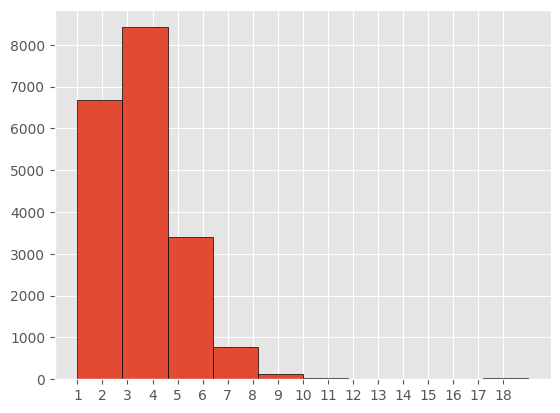

In [39]:
# define household size
df['hh_size'] = df.groupby('hhid')['hhmember'].transform('size')
df['hh_size'].hist(edgecolor='black')
plt.xticks(range(df.hh_size.min(), df.hh_size.max()));

# Education

In [40]:
df['attended_school'] = df['attended_school'].replace({1.0:1.0, 3.0:0.0})
df.attended_school.value_counts(dropna=False)

attended_school
1.0    17383
0.0     2077
NaN        4
Name: count, dtype: int64

In [41]:
df.education.value_counts(dropna=False).sort_index()

education
1.0       76
2.0       15
3.0     7289
4.0     4837
5.0      263
6.0     2687
7.0      170
8.0      241
9.0     1722
10.0      78
98.0       5
NaN     2081
Name: count, dtype: int64

In [42]:
"""Note: lack of nan when attended_school = True implies that all nan values are caused by not attending school
"""
df.loc[df.attended_school == True, 'education'].value_counts(dropna=False).sort_index()

education
1.0       76
2.0       15
3.0     7289
4.0     4837
5.0      263
6.0     2687
7.0      170
8.0      241
9.0     1722
10.0      78
98.0       5
Name: count, dtype: int64

In [43]:
# if did not attend school then identify as having a low education level
df.loc[(df.attended_school == False) | (df.attended_school.isna()), 'education'] = 1.0

In [44]:
education

{'1': 'Low',
 '2': 'Low',
 '3': 'Low',
 '4': 'Medium',
 '5': 'Medium',
 '6': 'Medium',
 '7': 'Medium',
 '8': 'Medium',
 '9': 'High',
 '10': 'High',
 '98': 'Low'}

In [45]:
df.education = df.education.astype(int).astype('str').replace(education)
df['education'] = pd.Categorical(df['education'], categories=['Low', 'Medium', 'High'])
df.education.value_counts(dropna=False)

education
Low       9466
Medium    8198
High      1800
Name: count, dtype: int64

<Axes: >

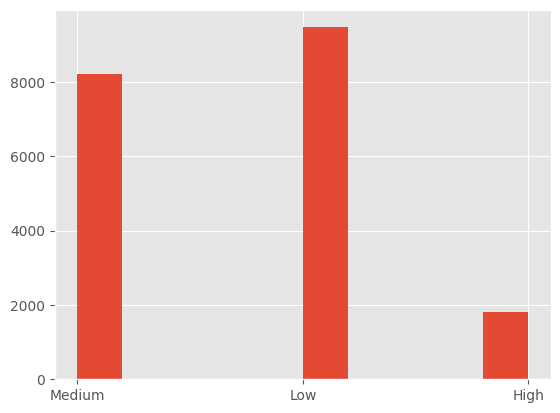

In [46]:
df.education.hist()

# Age

In [47]:
df.age.isna().sum()

1

In [48]:
# restrict to people with a well defined age
# this also removes income from people below 20 years of age or above 65 years of age from being included in household income
df = (df.query('age >= 20')
      .query('age <= 65')
)
df['age_sq'] = df['age']**2

<Axes: >

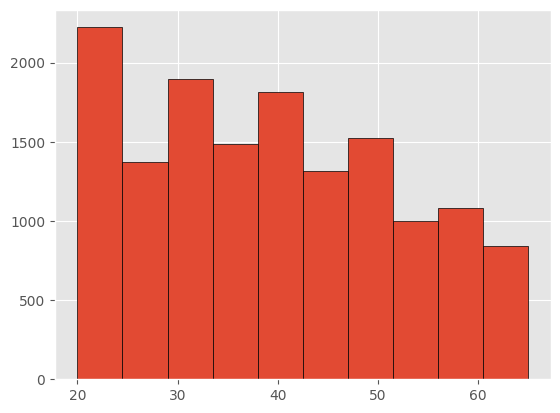

In [49]:
df.age.hist(edgecolor='black')

# Sex

In [50]:
df.sex.value_counts(dropna=False)

sex
1.0    8146
3.0    4401
2.0    1993
NaN       5
Name: count, dtype: int64

In [51]:
df['sex'] = df['sex'].replace(
    {1.0:'Female',
     2.0:'Male',
     3.0:'Male', 
     np.nan:'Male'
     }
    )
df.sex.value_counts(dropna=False)

sex
Female    8146
Male      6399
Name: count, dtype: int64

<Axes: >

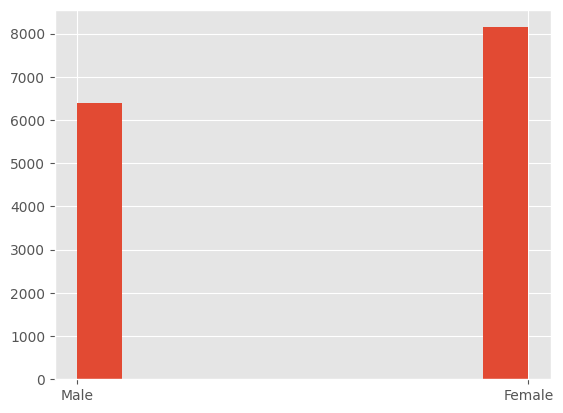

In [52]:
df.sex.hist()

# Income
- This section computes income at the household level
- Income can come from 1) main_job, 2)second_job, 3)main_business, 4)second_business

In [53]:
"""Income Type
undetailed : single measure of income
detailed : income separated into wages, tips, etc
"""
df.income_type = df.income_type.replace({
    3.0:'undetailed',
    1.0:'detailed',
    8.0:'dk'
})
df.income_type.value_counts(dropna=False)

income_type
NaN           9028
undetailed    4413
detailed       781
dk             323
Name: count, dtype: int64

<Axes: >

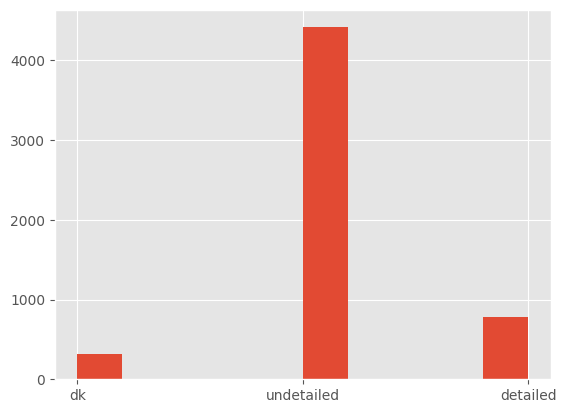

In [54]:
df.income_type.hist()

In [55]:
# main job
df['income_main_job'] = 0.00

undetailed_income_main_job = df['income_type'] == 'undetailed'
detailed_income_main_job   = df['income_type'] == 'detailed'
dk_income_main_job  = df['income_type'] == 'dk'

# if income is undetailed, then input undetailed income column
df.loc[undetailed_income_main_job, 'income_main_job'] = df.loc[undetailed_income_main_job, 'income_undetailed']

## Detailed Income
- This section computes income for households that have detailed income information which is split into wages, tips, etc.

In [56]:
detailed_income_sources = ['wage', 'piecework', 'tips', 'extrahours', 'christmasbonus', 'bonus', 'profitdist', 'other']
has_values = {
    'wage':'A',
    'piecework':'B',
    'tips':'C',
    'extrahours':'D',
    'christmasbonus':'E',
    'bonus':'F',
    'profitdist':'H',
    'other':'M'
}

In [57]:
for detailed_income_source in detailed_income_sources:
    # indicator for if household knows the value of this detailed income source
    knows = df['has_' + detailed_income_source] == has_values[detailed_income_source]

    # indicator for if household does not know the value of this detailed income sources
    dk = df['has_' + detailed_income_source] == 8

    # impute households with unknown detailed income to the average of that income source for households who do know their value
    df.loc[dk, detailed_income_source] = np.average(df.loc[knows, detailed_income_source],
                                                    weights = df.loc[knows, 'weight_ind'])

    # if nan, assume household does not receive any income from that detailed income source
    df[detailed_income_source] = df[detailed_income_source].fillna(0.00)

# for households with detailed income, income_main_job is the sum of their detailed income sources
df.loc[detailed_income_main_job, 'income_main_job'] = df.loc[detailed_income_main_job, detailed_income_sources].sum(axis=1)

## Imputing Unknown Income
- This section imputes income for main job, second job, main business, and second business
- Imputations are computed using a regression of demographic variables

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as ws
from statsmodels.stats.weightstats import DescrStatsW

from statsmodels.genmod.families.links import identity

def imputation_model(df, y, weight='weight_ind'):
    # obsrevables
    X = '~ age + age_sq + C(education) + C(sex) + C(hh_size)'

    # this method removes outlier y observables above the 99.5 percentile
    q_995 = DescrStatsW(df[y], df[weight]).quantile(0.995).iloc[0]
    df_focus = df[df[y] <= q_995]

    reg = y + X
    model = smf.glm(reg, df_focus, freq_weights=df_focus[weight]).fit()
    del df_focus
    return model

In [59]:
df['log_income_main_job'] = np.log(df.income_main_job)
model_income = imputation_model(df[undetailed_income_main_job], y='log_income_main_job')

# predict income_main_job for those who do not know it using the model
df.loc[dk_income_main_job, 'income_main_job'] = np.exp(model_income.predict(df[dk_income_main_job]))
model_income.summary()

/Users/mitch/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     log_income_main_job   No. Observations:                 4343
Model:                             GLM   Df Residuals:                 15431991
Model Family:                 Gaussian   Df Model:                           15
Link Function:                Identity   Scale:                         0.95254
Method:                           IRLS   Log-Likelihood:            -2.1522e+07
Date:                 Mon, 22 Jan 2024   Deviance:                   1.4700e+07
Time:                         11:14:23   Pearson chi2:                 1.47e+07
No. Iterations:                      3   Pseudo R-squ. (CS):              1.000
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.1076      0.003   2622.981      0.000       8.102       8.114
C(education)[T.Medium]     0.5250      0.001    880.461      0.000       0.524       0.526
C(education)[T.High]       1.1515      0.001   1498.008      0.000       1.150       1.153
C(sex)[T.Male]             0.3046      0.001    575.001      0.000       0.304       0.306
C(hh_size)[T.2]           -0.1257      0.001   -107.953      0.000      -0.128      -0.123
C(hh_size)[T.3]           -0.1804      0.001   -153.244      0.000      -0.183      -0.178
C(hh_size)[T.4]           -0.2556      0.001   -211.489      0.000      -0.258      -0.253
C(hh_size)[T.5]           -0.2391      0.001   -185.914      0.000      -0.242      -0.237
C(hh_size)[T.6]           -0.3571      0.001   -248.154      0.000      -0.360      -0.354
C(hh_size)[T.7]           -0.4908      0.002   -274.154      0.000      -0.494      -0.487
C(hh_size)[T.8]           -0.1996      0.002    -85.870      0.000      -0.204      -0.195
C(hh_size)[T.9]            0.0598      0.003     18.084      0.000       0.053       0.066
C(hh_size)[T.10]           0.3852      0.005     73.193      0.000       0.375       0.396
C(hh_size)[T.14]          -2.2385      0.025    -90.370      0.000      -2.287      -2.190
age                        0.0862      0.000    566.871      0.000       0.086       0.087
age_sq                    -0.0010   1.93e-06   -502.795      0.000      -0.001      -0.001
==========================================================================================
"""

### Second Job

In [60]:
df['has_income_second_job'] = df['has_income_second_job'].replace({
    3.0:1, 
    8.0:-1,
    np.nan:0
})
df.has_income_second_job.value_counts()

has_income_second_job
 0.0    14444
 1.0       86
-1.0       15
Name: count, dtype: int64

In [61]:
no_income_second_job = df['has_income_second_job'] == 0
know_income_second_job = df['has_income_second_job'] == 1
dk_income_second_job = df['has_income_second_job'] == -1

df['log_income_second_job'] = np.log(df['income_second_job'])

# regress log undetailed income on observables for those who know their undetailed income
model_income = imputation_model(df[know_income_second_job], y='log_income_second_job')

# predict income_second_job for those who do not know it using the traind model
df.loc[dk_income_second_job, 'income_second_job'] = np.exp(model_income.predict(df[dk_income_second_job]))
model_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     log_income_second_job   No. Observations:                   85
Model:                               GLM   Df Residuals:                   300943
Model Family:                   Gaussian   Df Model:                           10
Link Function:                  Identity   Scale:                          2.4230
Method:                             IRLS   Log-Likelihood:            -5.6020e+05
Date:                   Mon, 22 Jan 2024   Deviance:                   7.2917e+05
Time:                           11:14:23   Pearson chi2:                 7.29e+05
No. Iterations:                        3   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.3218      0.043    218.877      0.000       9.238       9.405
C(education)[T.Medium]     1.5604      0.008    205.939      0.000       1.546       1.575
C(education)[T.High]       2.5542      0.008    322.462      0.000       2.539       2.570
C(sex)[T.Male]             0.0017      0.007      0.256      0.798      -0.011       0.014
C(hh_size)[T.2]           -0.3593      0.011    -33.000      0.000      -0.381      -0.338
C(hh_size)[T.3]           -0.4430      0.011    -40.824      0.000      -0.464      -0.422
C(hh_size)[T.4]           -0.7815      0.012    -66.282      0.000      -0.805      -0.758
C(hh_size)[T.5]            0.2053      0.016     13.020      0.000       0.174       0.236
C(hh_size)[T.6]           -2.0883      0.013   -156.403      0.000      -2.115      -2.062
age                       -0.0801      0.002    -37.174      0.000      -0.084      -0.076
age_sq                     0.0012   2.78e-05     43.307      0.000       0.001       0.001
==========================================================================================
"""

## Main and Second Business

In [62]:
df.earn_main_business.value_counts(dropna=False)

earn_main_business
NaN    12746
2.0     1799
Name: count, dtype: int64

In [63]:
# no main business owners that do not know their income
df.loc[df.earn_main_business == 2.0, 'income_main_business'].isna().sum()

0

In [64]:
df.earn_second_business.value_counts(dropna=False)

earn_second_business
NaN    14411
2.0      134
Name: count, dtype: int64

In [65]:
# no second business owners that do not know their income
df.loc[df.earn_second_business == 2.0, 'income_second_business'].isna().sum()

0

## Summing over Income Sources

In [66]:
# sum income from jobs and businesses
income_sources = [
    'income_main_job',
    'income_second_job',
    'income_main_business',
    'income_second_business'
]

# collect income from each column
# this summation implicitly treats nan values as zero
# e.g. someone who does not have a main business implicitly has income_main_business = 0
df['income'] = df[income_sources].sum(axis=1)

# generate log income
df['log_income'] = np.log(df['income'])

/Users/mitch/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [67]:
# remove detailed income columns
detailed_columns = detailed_income_sources + ['has_'+x for x in detailed_income_sources]
df = df.drop(columns=detailed_columns)

# Work Industry

In [68]:
naics

{'-1': 'None',
 '11': 'Agriculture',
 '21': 'Mining',
 '22': 'Utilities',
 '23': 'Construction',
 '31': 'Manufacturing',
 '32': 'Manufacturing',
 '33': 'Manufacturing',
 '43': 'Wholesale',
 '46': 'Retail',
 '48': 'Transportation',
 '49': 'Transportation',
 '51': 'Massive Means Information',
 '52': 'Financial / Insurance',
 '53': 'Real Estate',
 '54': 'Professional / Scientific',
 '55': 'Corporate',
 '56': 'Business Services',
 '61': 'Education',
 '62': 'Health / Social Services',
 '71': 'Cultural / Sport / Recreational',
 '72': 'Hospitality',
 '81': 'Other Services (Not Government)',
 '93': 'Government',
 '99': 'Other'}

In [69]:
df.naics_classification.fillna(-1, inplace=True)
df.naics_classification.value_counts(dropna=False)

naics_classification
-1.0     6164
 11.0    1535
 46.0    1274
 23.0     806
 81.0     704
 31.0     672
 61.0     463
 72.0     423
 33.0     373
 93.0     367
 99.0     301
 48.0     293
 32.0     221
 62.0     198
 54.0     185
 56.0     158
 43.0      92
 71.0      69
 21.0      53
 52.0      52
 51.0      50
 22.0      36
 53.0      36
 49.0      17
 55.0       3
Name: count, dtype: int64

In [70]:
df['naics_classification'] = df.naics_classification.astype(int).astype(str).replace(naics)
df.naics_classification.value_counts(dropna=False)

naics_classification
None                               6164
Agriculture                        1535
Retail                             1274
Manufacturing                      1266
Construction                        806
Other Services (Not Government)     704
Education                           463
Hospitality                         423
Government                          367
Transportation                      310
Other                               301
Health / Social Services            198
Professional / Scientific           185
Business Services                   158
Wholesale                            92
Cultural / Sport / Recreational      69
Mining                               53
Financial / Insurance                52
Massive Means Information            50
Utilities                            36
Real Estate                          36
Corporate                             3
Name: count, dtype: int64

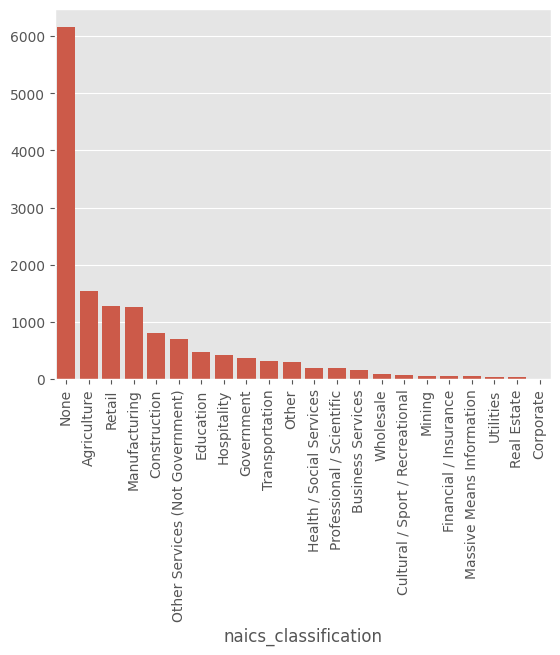

In [71]:
vc =  df.naics_classification.value_counts(dropna=False)
sns.barplot(x=vc.index, y=vc.values)
plt.xticks(rotation=90);

# Debts

In [72]:
df['has_debts'] = df['has_debts'].replace(
    {1.0:1, 8.0:0}
    ).fillna(0)

no_debts = df['has_debts'] == 0
df.loc[no_debts, 'debts'] = 0.0

df['has_debts'] = (df['debts'] > 0).astype(bool)
df.has_debts.value_counts()

has_debts
False    10032
True      4513
Name: count, dtype: int64

# Loans

In [73]:
df.asked_for_loan_12mth.value_counts(dropna=False)

asked_for_loan_12mth
NaN    8823
3.0    4267
1.0    1455
Name: count, dtype: int64

In [74]:
df['asked_for_loan_12mth'] = df['asked_for_loan_12mth'].replace(
    {1.0:1, 3.0:0, np.nan:0}
)
df['asked_for_loan_12mth'] = df['asked_for_loan_12mth'].astype(bool)
df.asked_for_loan_12mth.value_counts(dropna=False)

asked_for_loan_12mth
False    13090
True      1455
Name: count, dtype: int64

In [75]:
loan_types = {
    1.0:'bank',
    2.0:'savings_fund',
    3.0:'moneylender',
    4.0:'relative',
    5.0:'friends',
    6.0:'work',
    7.0:'pawnshop',
    8.0:'verbal_agreement_credit_program',
    9.0:'other_govt',
    10.0:'other',
    -1.0: np.nan
}
df['loan_type'] = df['loan_type'].replace(loan_types)
df.loan_type.value_counts(dropna=False)

loan_type
NaN                                13091
relative                             339
friends                              258
savings_fund                         221
moneylender                          156
work                                 124
bank                                 122
other                                111
pawnshop                              90
other_govt                            26
verbal_agreement_credit_program        7
Name: count, dtype: int64

In [76]:
got_loan = df['received_loan'] == 1.0
df.loc[~got_loan, 'loan'] = 0.0

df['has_loan'] = ~df.loan_type.isna() & got_loan
df.has_loan.value_counts()

has_loan
False    13101
True      1444
Name: count, dtype: int64

In [77]:
formal = ['bank', 'savings_fund', 'moneylender', 'pawnshop']
informal = ['relative', 'friends', 'work', 'verbal_agreement_credit_program', 'other_govt', 'other']
friends_relatives = ['relative', 'friends']

df['has_loan_formal']            = df['loan_type'].isin(formal)
df['has_loan_informal']          = df['loan_type'].isin(informal)
df['has_loan_friends_relatives'] = df['loan_type'].isin(friends_relatives)

df['loan_formal']   = df['loan']*df['has_loan_formal'] 
df['loan_informal'] = df['loan']*df['has_loan_informal'] 
df['loan_friends_relatives']   = df['loan']*df['has_loan_friends_relatives'] 

# Savings

In [78]:
df.has_savings.value_counts(dropna=False)

has_savings
3.0    12653
1.0     1678
7.0      110
NaN      104
Name: count, dtype: int64

In [79]:
has_savings = df['has_savings'] == 1.0
no_savings = df['has_savings'] == 3.0
dk_savings = df['has_savings'] == 7.0

#df.loc[has_savings, 'savings'] = df.loc[df.has_savings, 'savings']
df.loc[no_savings, 'savings'] = 0.0
df.loc[dk_savings, 'savings'] = 0.0

In [80]:
df['has_savings'] = df['has_savings'].replace({
    1.0   : True,
    3.0   : False,
    7.0   : False,
    np.nan: False # if nan have no savings
})
df.has_savings.value_counts(dropna=False)

has_savings
False    12867
True      1678
Name: count, dtype: int64

In [81]:
savings_locations = {
   'has_savings_none'          : 1.0,
   'has_savings_bank'          : 2.0,
   'has_savings_coop'          : 3.0,
   'has_savings_savingsbank'   : 4.0,
   'has_savings_friend_not_hhm': 5.0,
   'has_savings_afores'        : 6.0,
   'has_savings_caja_solidaria': 7.0,
   'has_savings_house'         : 8.0,
   'has_savings_work'          : 9.0,
   'has_savings_other'         : 10.0
}

In [82]:
for savings_type in list(savings_locations.keys()):
    df[savings_type] = (df[savings_type] == savings_locations[savings_type]).astype(bool)

In [83]:
df.loc[dk_savings, list(savings_locations.keys())].sum()

has_savings_none              0
has_savings_bank              0
has_savings_coop              0
has_savings_savingsbank       0
has_savings_friend_not_hhm    0
has_savings_afores            0
has_savings_caja_solidaria    0
has_savings_house             0
has_savings_work              0
has_savings_other             0
dtype: int64

In [84]:
get_sum = [
    'income',
    'savings',
    'debts',
    'loan',
    'loan_informal',
    'loan_formal', 
    'loan_friends_relatives'
]

get_any = [
    'has_savings',
    'has_debts', 
    'has_loan',
    'has_loan_formal',
    'has_loan_informal',
    'has_loan_friends_relatives',
    'has_savings_none',
    'has_savings_bank',
    'has_savings_coop',
    'has_savings_savingsbank',
    'has_savings_friend_not_hhm',
    'has_savings_afores',
    'has_savings_caja_solidaria',
    'has_savings_house',
    'has_savings_work',
    'has_savings_other'
]

# get sum over set of individuals in household
for var in get_sum:
    df[var] = df.groupby('hhid')[var].transform('sum')

# return true if tru for any individual in the household
for var in get_any:
    df[var] = df.groupby('hhid')[var].transform(lambda x : x.sum() > 0)

In [85]:
# create single observation for each household by restricting to household head
# this implicitly restricts all demographic variables to that of the household head
df = df[df['is_hhm'] == 1.0].reset_index(drop=True)

# Liquid Assets
- This section defines the liquid asset position: gross savings minus gross debts

In [86]:
df['liquid'] = df['savings'] - df['debts']
df['has_liquid'] = df['liquid'] != 0

# Income Outliers

In [87]:
# remove household above the 99.5% of income
from statsmodels.stats.weightstats import DescrStatsW
q_995 = DescrStatsW(df['income'], df['weight_ind']).quantile(0.995).iloc[0]
df = df[df['income'] <= q_995]

df = df[df.income > 0]

q_005 = DescrStatsW(df['income'], df['weight_ind']).quantile(0.005).iloc[0]
df = df[df['income'] >= q_005]

In [88]:
os.chdir(interim)
df.to_csv('ind_2005.csv', index=False)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 0 to 5111
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   hhid                        3715 non-null   object  
 1   hhmember                    3715 non-null   object  
 2   weight_ind                  3715 non-null   float64 
 3   is_hhm                      3715 non-null   float64 
 4   age                         3715 non-null   float64 
 5   attended_school             3714 non-null   float64 
 6   education                   3715 non-null   category
 7   sex                         3715 non-null   object  
 8   income_type                 2570 non-null   object  
 9   income_undetailed           2049 non-null   float64 
 10  has_income_second_job       3715 non-null   float64 
 11  income_second_job           52 non-null     float64 
 12  earn_main_business          663 non-null    float64 
 13  income_main_business   